# Repeated Guest Prediction: Hotel Customer Loyalty

Part 2: Data Visualisation

In [2]:
import sys
print(sys.version)

3.12.11 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 08:03:38) [Clang 14.0.6 ]


In [3]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# read data

df0 = pd.read_csv('hotel-booking_cleaned.csv')
df = df0.copy()

## Initial Data Overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79213 entries, 0 to 79212
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   hotel                            79213 non-null  object 
 1   is_cancelled                     79213 non-null  int64  
 2   lead_time                        79213 non-null  int64  
 3   arrival_date_year                79213 non-null  int64  
 4   arrival_date_month               79213 non-null  object 
 5   arrival_date_week_number         79213 non-null  int64  
 6   arrival_date_day_of_month        79213 non-null  int64  
 7   stays_in_weekend_nights          79213 non-null  int64  
 8   stays_in_week_nights             79213 non-null  int64  
 9   adults                           79213 non-null  int64  
 10  children                         79213 non-null  int64  
 11  babies                           79213 non-null  int64  
 12  meal              

In [6]:
df.isna().sum()

hotel                              0
is_cancelled                       0
lead_time                          0
arrival_date_year                  0
arrival_date_month                 0
arrival_date_week_number           0
arrival_date_day_of_month          0
stays_in_weekend_nights            0
stays_in_week_nights               0
adults                             0
children                           0
babies                             0
meal                               0
country                            0
market_segment                     0
distribution_channel               0
is_repeated_guest                  0
previous_cancellations             0
previous_bookings_not_cancelled    0
reserved_room_type                 0
assigned_room_type                 0
booking_changes                    0
deposit_type                       0
agent                              0
days_in_waiting_list               0
customer_type                      0
adr                                0
r

In [7]:
df.duplicated(keep=False).sum()

np.int64(0)

## Data Visualisation

### `Hotel`

In [39]:
hotel = df.hotel.value_counts()

hotel

hotel
City Hotel      47576
Resort Hotel    31637
Name: count, dtype: int64

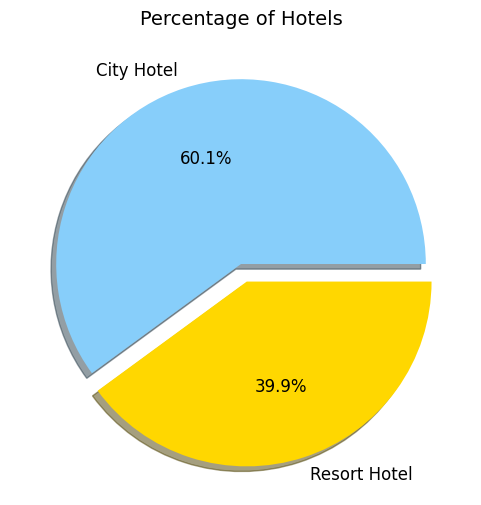

In [41]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x=hotel.values, 
       labels=hotel.index, 
       autopct='%.1f%%',
       explode=(0, 0.1),
       colors=['lightskyblue', 'gold'],
       textprops={'fontsize': 12},
       shadow=True
       )

plt.title("Percentage of Hotels", fontdict = {'fontsize': 14})

plt.show()

## `is_cancelled`

In [42]:
cancellation = df.is_cancelled.value_counts()

cancellation

is_cancelled
0    58444
1    20769
Name: count, dtype: int64

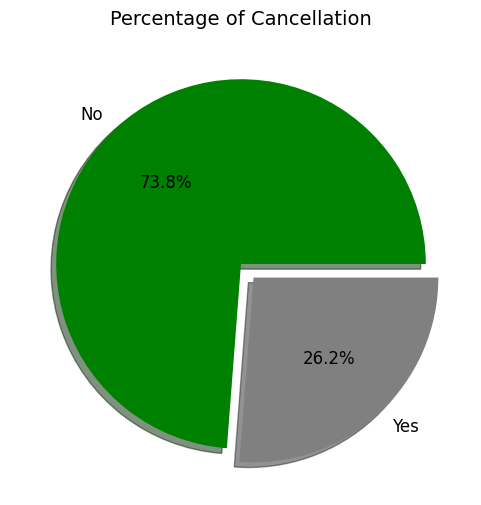

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x=cancellation.values, 
       labels=['No', 'Yes'], 
       autopct='%.1f%%',
       explode=(0, 0.1),
       colors=['Green', 'Grey'],
       textprops={'fontsize': 12},
       shadow=True
       )

plt.title("Percentage of Cancellation", fontdict = {'fontsize': 14})

plt.show()

## `lead_time`

In [12]:
pd.set_option('display.max_rows', None)

In [45]:
df.lead_time.describe()

count    79213.000000
mean        75.595862
std         81.851415
min          0.000000
25%         10.000000
50%         46.000000
75%        118.000000
max        737.000000
Name: lead_time, dtype: float64

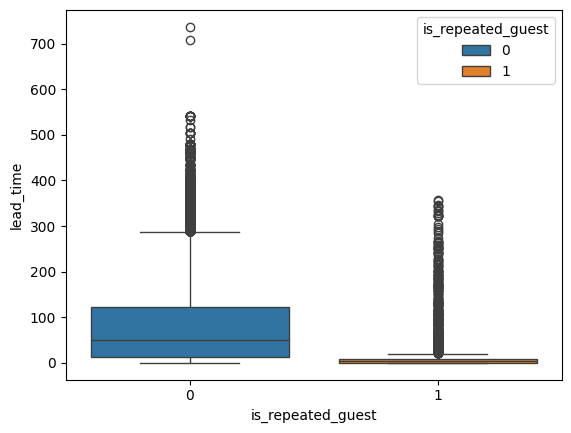

In [38]:
sns.boxplot(x=df['is_repeated_guest'],y=df['lead_time'], hue=df['is_repeated_guest']);

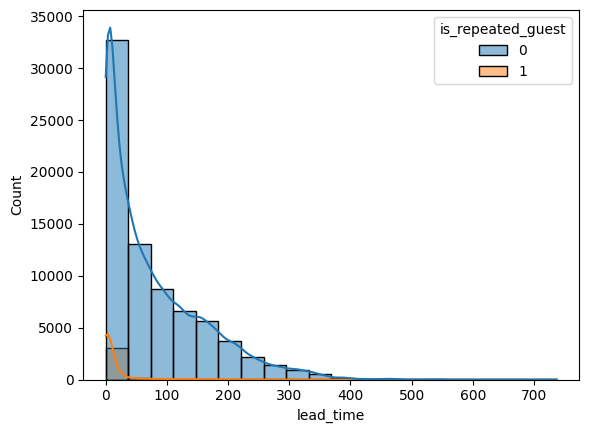

In [44]:
sns.histplot(x=df['lead_time'], kde=True,bins=20, hue=df.is_repeated_guest);

## `arrival_date_year`

In [33]:
df.arrival_date_year.value_counts()

arrival_date_year
2016    38664
2017    28977
2015    11572
Name: count, dtype: int64

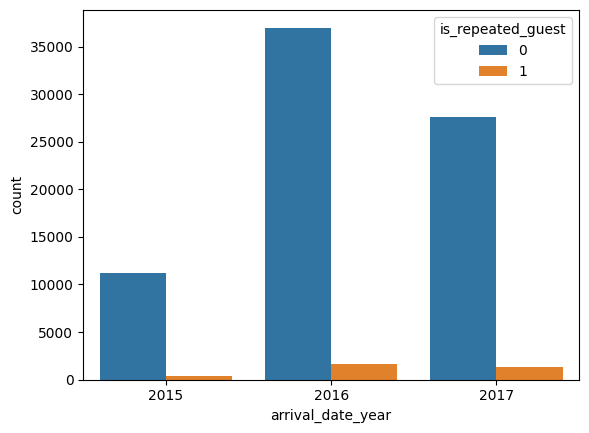

In [53]:
sns.countplot(data=df, x='arrival_date_year', hue='is_repeated_guest');

## `arrival_date_month`

In [57]:
df.arrival_date_month.value_counts()

arrival_date_month
August       10461
July          9292
May           7487
April         7090
June          7057
March         6853
October       5995
September     5892
February      5641
December      4627
November      4494
January       4324
Name: count, dtype: int64

In [63]:
 month_order = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]

/var/folders/m8/hw4_k6s95rg65tjlnkq6r2ym0000gn/T/ipykernel_3503/1189437568.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


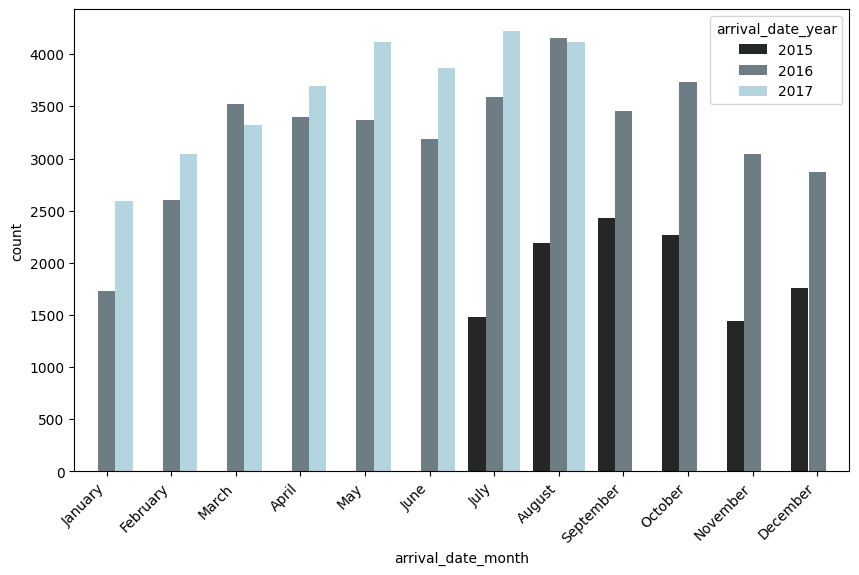

In [68]:
plt.figure(figsize=(10, 6)) # Optional: Adjust figure size
ax = sns.countplot(
        data=df, 
        x='arrival_date_month', 
        hue='arrival_date_year', 
        order=month_order,
        palette="dark:lightblue"
    )

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show();

## `arrival_date_week_number`

In [77]:
df.arrival_date_week_number.value_counts()

arrival_date_week_number
33    2591
34    2313
32    2247
28    2189
31    2130
30    2115
29    2042
27    2014
35    1964
18    1888
21    1831
15    1803
23    1706
17    1677
13    1674
25    1651
20    1640
19    1616
22    1569
24    1567
26    1566
16    1539
14    1517
11    1516
7     1510
36    1500
10    1488
41    1457
9     1449
38    1448
12    1426
43    1404
8     1386
39    1374
44    1357
37    1320
53    1272
6     1225
40    1223
42    1188
45    1172
47    1154
48    1077
46    1049
4     1040
49    1030
5     1027
52     976
3      960
50     952
2      874
1      784
51     726
Name: count, dtype: int64

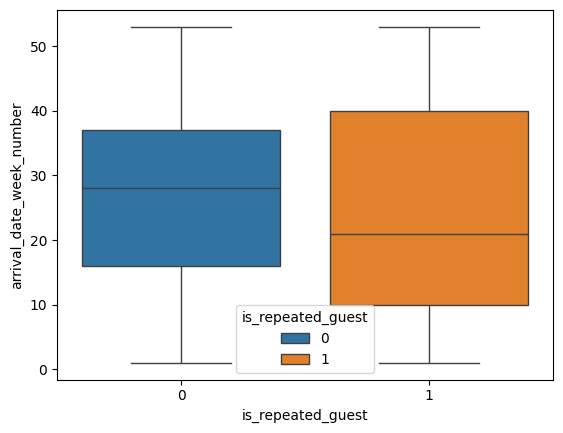

In [86]:
sns.boxplot(x=df['is_repeated_guest'],y=df['arrival_date_week_number'], hue=df['is_repeated_guest']);

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79213 entries, 0 to 79212
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   hotel                            79213 non-null  object 
 1   is_cancelled                     79213 non-null  int64  
 2   lead_time                        79213 non-null  int64  
 3   arrival_date_year                79213 non-null  int64  
 4   arrival_date_month               79213 non-null  object 
 5   arrival_date_week_number         79213 non-null  int64  
 6   arrival_date_day_of_month        79213 non-null  int64  
 7   stays_in_weekend_nights          79213 non-null  int64  
 8   stays_in_week_nights             79213 non-null  int64  
 9   adults                           79213 non-null  int64  
 10  children                         79213 non-null  int64  
 11  babies                           79213 non-null  int64  
 12  meal              

## `arrival_date_day_of_month`

In [76]:
df.arrival_date_day_of_month.value_counts()

arrival_date_day_of_month
17    2754
2     2735
26    2703
19    2677
28    2672
11    2668
5     2660
20    2653
16    2652
27    2651
29    2644
18    2636
12    2632
13    2581
15    2581
3     2579
9     2577
21    2566
8     2551
4     2551
1     2548
10    2548
6     2546
23    2527
25    2513
7     2488
30    2486
24    2477
14    2455
22    2313
31    1589
Name: count, dtype: int64

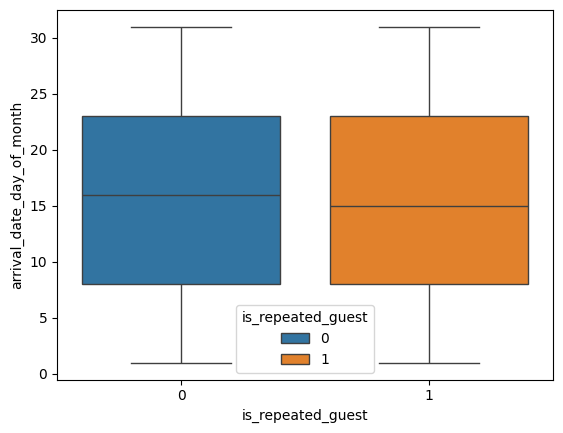

In [85]:
sns.boxplot(x=df['is_repeated_guest'],y=df['arrival_date_day_of_month'], hue=df['is_repeated_guest']);

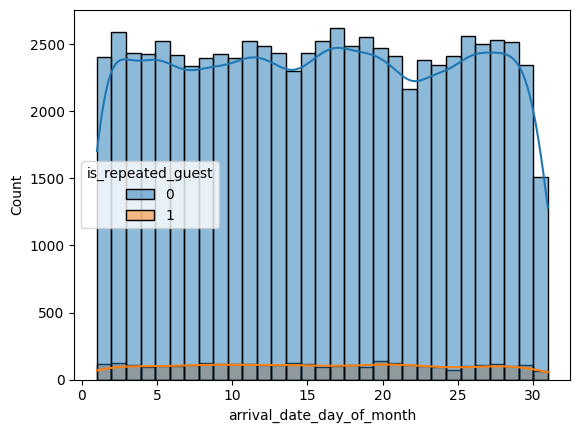

In [137]:
sns.histplot(x=df['arrival_date_day_of_month'], kde=True, bins=31, hue=df['is_repeated_guest']);

## `stays_in_weekend_nights`

In [83]:
stays_weekend_nights = df.stays_in_weekend_nights.value_counts()

stays_weekend_nights

stays_in_weekend_nights
0     31452
2     24235
1     20518
4      1653
3      1079
6       106
5        66
8        60
7        13
9         9
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: count, dtype: int64

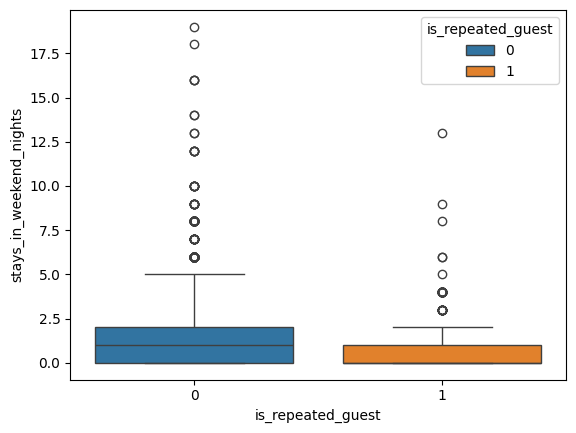

In [88]:
sns.boxplot(x=df['is_repeated_guest'],y=df['stays_in_weekend_nights'], hue=df['is_repeated_guest']);

## `stays_in_week_nights`

In [84]:
stays_week_nights = df.stays_in_week_nights.value_counts()

stays_week_nights

stays_in_week_nights
1     19961
2     18381
3     14652
5      8990
4      7281
0      5681
6      1303
10      926
7       920
8       582
9       211
15       65
11       49
20       41
12       38
13       27
14       22
19       17
21       15
16       12
22        7
25        6
18        6
30        5
17        4
40        2
33        1
24        1
42        1
50        1
32        1
26        1
34        1
35        1
41        1
Name: count, dtype: int64

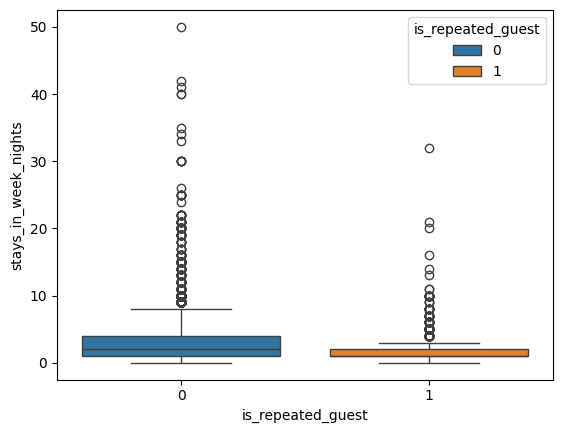

In [89]:
sns.boxplot(x=df['is_repeated_guest'],y=df['stays_in_week_nights'], hue=df['is_repeated_guest']);

## `adults`

In [80]:
df.adults.value_counts()

adults
2     58467
1     14555
3      5746
0       371
4        58
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

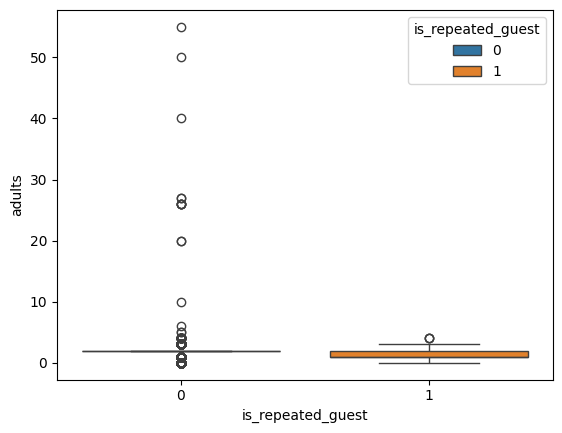

In [91]:
sns.boxplot(x=df['is_repeated_guest'],y=df['adults'], hue=df['is_repeated_guest']);

## `babies`

In [79]:
df.babies.value_counts()

babies
0     78302
1       894
2        15
10        1
9         1
Name: count, dtype: int64

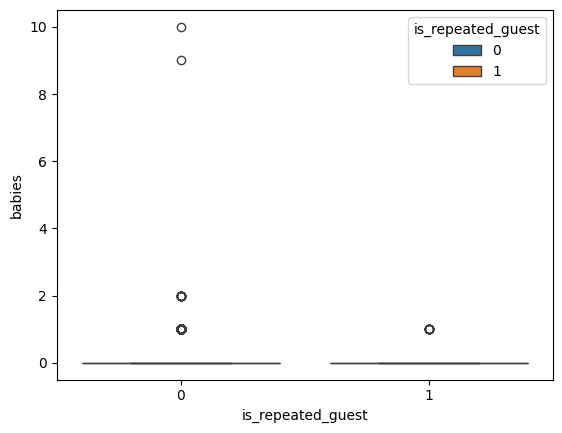

In [92]:
sns.boxplot(x=df['is_repeated_guest'],y=df['babies'], hue=df['is_repeated_guest']);

## `meal`

In [150]:
meal = df.meal.value_counts()

meal

meal
BB           61083
SC            8604
HB            7880
Undefined      362
FB             307
Name: count, dtype: int64

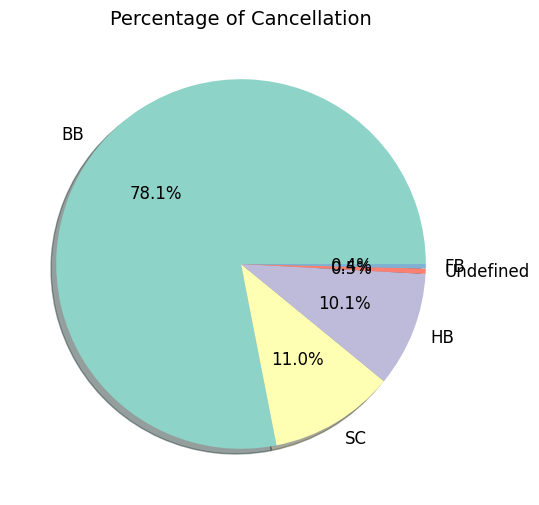

In [153]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x=meal.values, 
       labels=meal.index, 
       autopct='%.1f%%',
       colors=sns.color_palette('Set3'),
       textprops={'fontsize': 12},
       shadow=True
       )

plt.title("Percentage of Cancellation", fontdict = {'fontsize': 14})

plt.show()

## `country`

In [71]:
df.country.value_counts()

country
PRT        24255
GBR         9555
FRA         8106
ESP         6725
DEU         4795
IRL         2846
ITA         2735
BEL         1905
BRA         1840
NLD         1772
USA         1750
CHE         1447
CN          1004
AUT          825
SWE          747
CHN          726
POL          709
RUS          528
NOR          461
Unknown      442
ROU          428
FIN          401
DNK          355
AUS          348
ISR          333
AGO          328
LUX          247
MAR          221
ARG          197
TUR          191
HUN          182
JPN          174
IND          136
CZE          118
KOR          111
GRC          109
HRV           83
IRN           78
ZAF           76
EST           76
DZA           75
LTU           70
MEX           69
COL           67
CHL           65
BGR           62
UKR           60
NZL           57
LVA           47
MOZ           47
SRB           46
ARE           45
SVK           42
SAU           42
CYP           39
TWN           38
SVN           37
THA           36
TUN   

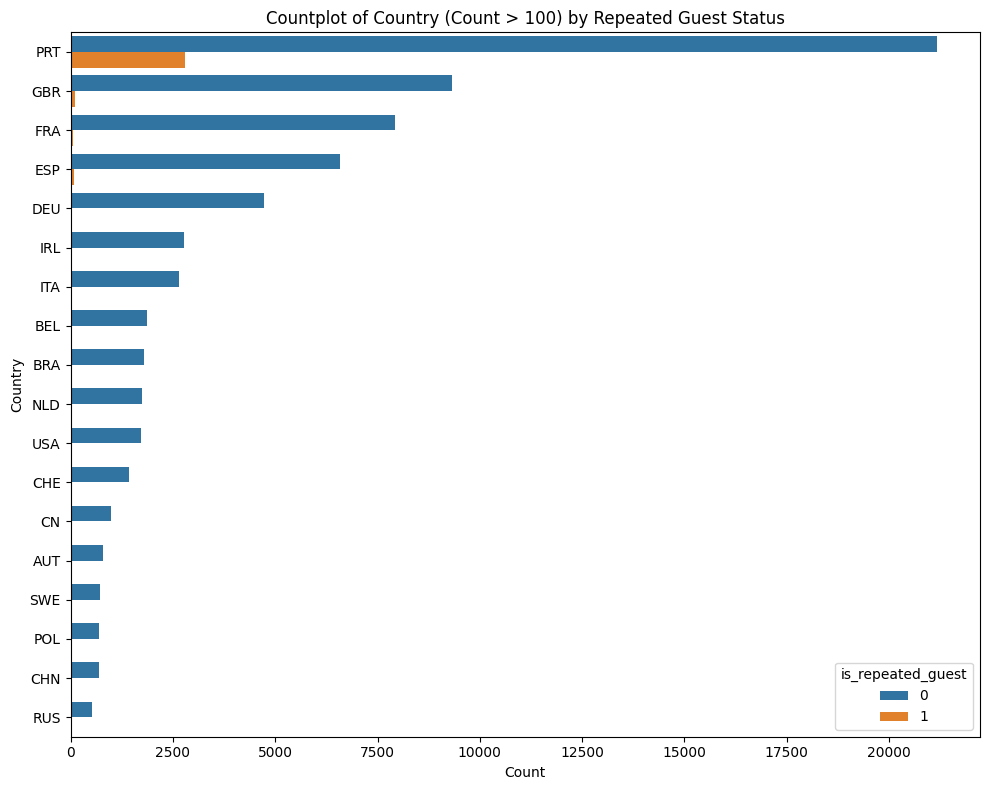

In [133]:
# 1. Count countries and filter those with count > 100
country_counts = df['country'].value_counts()
countries_to_keep = country_counts[country_counts > 500].index

# 2. Filter the DataFrame
df_filtered = df[df['country'].isin(countries_to_keep)]

# 3. Create the countplot
plt.figure(figsize=(10, 8))
# Order the bars by the total count of the country in the filtered dataset
sns.countplot(data=df_filtered, y="country", hue='is_repeated_guest',
              order=df_filtered['country'].value_counts().index)
plt.title('Countplot of Country (Count > 100) by Repeated Guest Status')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()

## `market_segment`

In [70]:
df.market_segment.value_counts()

market_segment
Online TA        48203
Offline TA/TO    12009
Direct           11200
Corporate         3817
Groups            3098
Complementary      668
Aviation           218
Name: count, dtype: int64

## `distribution_channel`

In [69]:
df.distribution_channel.value_counts()

distribution_channel
TA/TO        62298
Direct       12192
Corporate     4551
GDS            171
Undefined        1
Name: count, dtype: int64

<Axes: xlabel='distribution_channel', ylabel='count'>

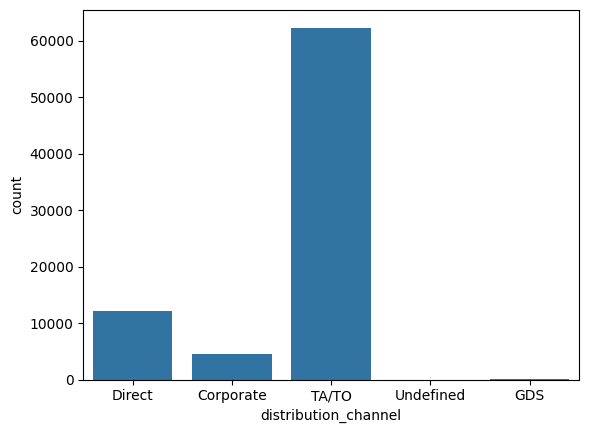

In [96]:
sns.countplot(data=df, x="distribution_channel")

## `is_repeated_guest`

In [55]:
repeated_guest = df.is_repeated_guest.value_counts()

repeated_guest

is_repeated_guest
0    75885
1     3328
Name: count, dtype: int64

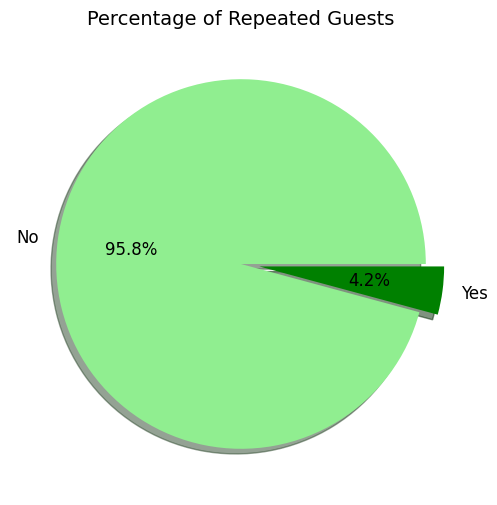

In [97]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x=repeated_guest.values, 
       labels=['No', 'Yes'], 
       autopct='%.1f%%',
       explode=(0, 0.1),
       colors=['lightgreen', 'Green'],
       textprops={'fontsize': 12},
       shadow=True
       )

plt.title("Percentage of Repeated Guests", fontdict = {'fontsize': 14})

plt.show()

## `previous_cancellations`

In [81]:
df.previous_cancellations.value_counts()

previous_cancellations
0     77937
1      1017
2       108
3        58
4        29
11       25
5        19
6        16
13        2
25        1
21        1
Name: count, dtype: int64

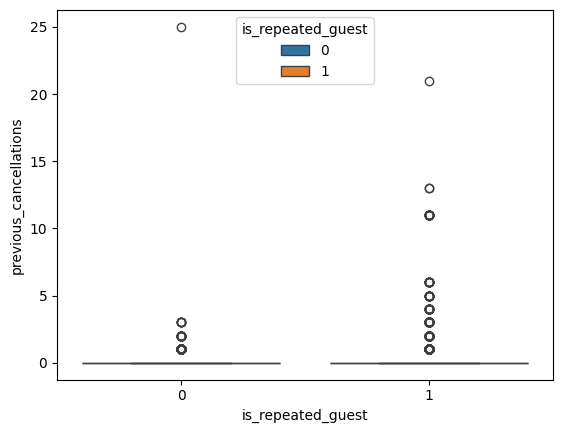

In [111]:
sns.boxplot(x=df['is_repeated_guest'],y=df['previous_cancellations'], hue=df['is_repeated_guest']);

## `previous_booking_not_cancelled`

In [114]:
df.previous_bookings_not_cancelled.value_counts()

previous_bookings_not_cancelled
0     75715
1      1444
2       580
3       329
4       227
5       181
6       113
7        86
8        70
9        58
10       51
11       41
12       37
13       30
14       28
15       21
16       20
17       16
18       14
19       13
20       12
21       12
22       10
24        9
25        9
27        9
26        7
28        7
23        7
29        6
30        4
31        2
32        2
58        2
48        2
44        2
62        1
56        1
57        1
59        1
60        1
61        1
65        1
63        1
64        1
66        1
67        1
68        1
69        1
70        1
71        1
54        1
55        1
36        1
53        1
41        1
33        1
34        1
35        1
37        1
38        1
39        1
40        1
42        1
52        1
43        1
45        1
46        1
47        1
49        1
50        1
51        1
72        1
Name: count, dtype: int64

## `reserved_room_type`

In [115]:
df.reserved_room_type.value_counts()

reserved_room_type
A    49965
D    16340
E     5743
F     2759
G     2016
C      904
B      885
H      592
L        6
P        3
Name: count, dtype: int64

## `assigned_room_type`

In [116]:
df.assigned_room_type.value_counts()

assigned_room_type
A    40572
D    20865
E     6823
F     3522
G     2452
C     2070
B     1580
H      701
I      351
K      273
P        3
L        1
Name: count, dtype: int64

## `booking_changes`

In [117]:
df.booking_changes.value_counts()

booking_changes
0     64386
1     10067
2      3324
3       838
4       343
5       114
6        55
7        31
8        17
9         8
10        6
13        5
14        5
15        3
16        2
17        2
12        2
11        2
20        1
21        1
18        1
Name: count, dtype: int64

## `deposit_type`

In [118]:
df.deposit_type.value_counts()

deposit_type
No Deposit    78856
Non Refund      271
Refundable       86
Name: count, dtype: int64

## `agent`

In [119]:
df.agent.value_counts()

agent
9      26562
240    12373
0      11114
14      3125
7       3111
250     2705
241     1585
28      1372
8       1284
40       936
6        870
314      792
242      687
1        580
83       557
85       499
243      443
171      367
27       351
22       320
11       291
196      267
15       265
177      243
138      235
3        228
96       208
16       199
5        192
10       187
156      185
42       179
115      177
195      171
175      170
86       165
143      154
251      152
37       148
152      148
26       147
168      135
134      131
315      130
229      128
273      122
95       117
2        116
147      114
410      111
21       110
142      108
146      105
19       102
94        94
298       90
89        83
330       79
159       74
69        74
12        73
13        72
36        70
52        69
20        68
75        68
30        64
191       64
98        61
339       61
464       59
118       59
39        56
185       55
253       54
531       52
184   

# `days_in_waiting_list`

In [120]:
df.days_in_waiting_list.value_counts()

days_in_waiting_list
0      78645
63        45
15        18
87        17
44        13
38        13
122       13
1         12
59        12
27        12
4         11
48        11
34        10
14         9
25         9
99         8
77         8
58         8
5          8
31         8
147        8
259        8
56         8
8          7
61         7
43         7
49         7
11         7
50         7
60         7
125        7
178        7
187        6
6          6
20         6
22         6
113        6
71         6
28         5
46         5
40         5
2          5
108        5
101        5
107        5
176        4
174        4
39         4
224        4
98         4
236        4
68         4
65         4
111        4
223        4
7          4
26         4
53         4
16         4
33         4
13         4
9          4
17         4
12         3
35         3
21         3
23         3
10         3
69         3
64         3
47         3
150        3
97         3
75         3
100        3
80  

## `customer_type`

In [142]:
customer_type = df.customer_type.value_counts()

customer_type

customer_type
Transient          66725
Transient-Party     8141
Contract            2854
Group                516
Name: count, dtype: int64

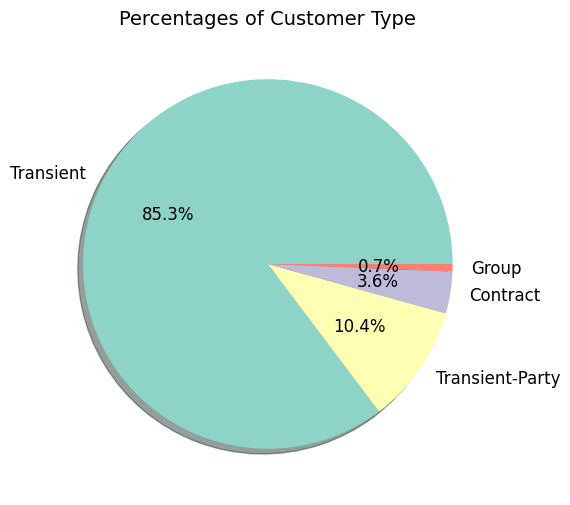

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x=customer_type.values, 
       labels=customer_type.index, 
       autopct='%.1f%%',
       colors=sns.color_palette('Set3'),
       textprops={'fontsize': 12},
       shadow=True
       )

plt.title("Percentages of Customer Type", fontdict = {'fontsize': 14})

plt.show()

## `adr`

In [100]:
df.adr.value_counts()

adr
 0.00       1658
 75.00      1108
 65.00      1036
 48.00       806
 95.00       744
 85.00       719
 99.00       674
 80.00       621
 126.00      611
 60.00       595
 120.00      592
 108.00      587
 90.00       584
 140.00      523
 160.00      479
 88.00       473
 79.20       473
 89.10       457
 68.00       455
 110.00      441
 135.00      438
 89.00       406
 117.00      388
 115.00      384
 70.00       365
 58.00       356
 74.80       356
 35.00       355
 100.00      355
 79.00       348
 98.00       347
 130.00      346
 170.00      345
 150.00      325
 105.00      318
 107.10      314
 76.50       314
 45.00       311
 66.00       306
 80.75       301
 67.00       296
 130.50      288
 144.00      286
 40.00       280
 119.00      279
 72.00       278
 42.00       278
 94.50       276
 43.00       276
 81.00       268
 55.00       266
 129.00      265
 96.30       265
 80.10       265
 125.00      261
 85.50       259
 139.00      258
 109.00      257
 180.00   

## `required_car_parking_spaces`

In [101]:
df.required_car_parking_spaces.value_counts()

required_car_parking_spaces
0    71984
1     7196
2       28
3        3
8        2
Name: count, dtype: int64

<Axes: xlabel='required_car_parking_spaces', ylabel='count'>

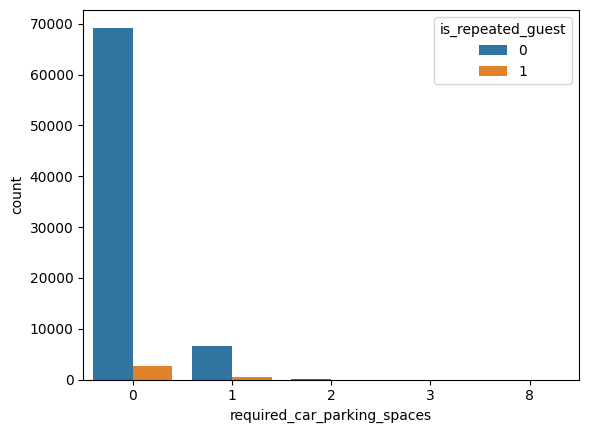

In [108]:
sns.countplot(data=df, x="required_car_parking_spaces", hue='is_repeated_guest')

## `total_of_special_requests`

In [102]:
df.total_of_special_requests.value_counts()

total_of_special_requests
0    38838
1    26921
2    10959
3     2158
4      304
5       33
Name: count, dtype: int64

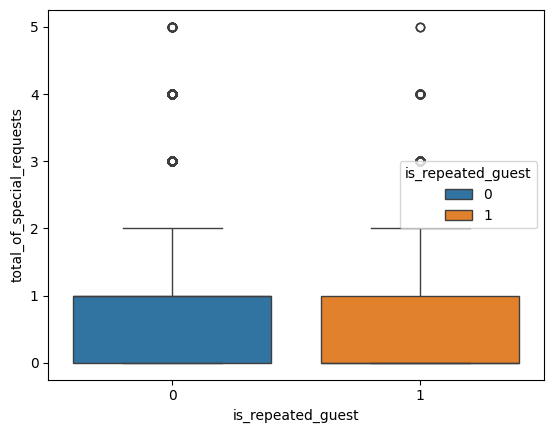

In [109]:
sns.boxplot(x=df['is_repeated_guest'],y=df['total_of_special_requests'], hue=df['is_repeated_guest']);

In [121]:
df = df.drop(columns=['total_of_special_requests'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79213 entries, 0 to 79212
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   hotel                            79213 non-null  object 
 1   is_cancelled                     79213 non-null  int64  
 2   lead_time                        79213 non-null  int64  
 3   arrival_date_year                79213 non-null  int64  
 4   arrival_date_month               79213 non-null  object 
 5   arrival_date_week_number         79213 non-null  int64  
 6   arrival_date_day_of_month        79213 non-null  int64  
 7   stays_in_weekend_nights          79213 non-null  int64  
 8   stays_in_week_nights             79213 non-null  int64  
 9   adults                           79213 non-null  int64  
 10  children                         79213 non-null  int64  
 11  babies                           79213 non-null  int64  
 12  meal              

In [122]:
df.duplicated().sum()

np.int64(349)

## `reservation_status`

In [110]:
df.reservation_status.value_counts()

reservation_status
Check-Out    58444
Canceled     19832
No-Show        937
Name: count, dtype: int64

In [124]:
df = df.drop(columns='reservation_status')

## `reservation_status_date`

In [123]:
df = df.drop(columns='reservation_status_date')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79213 entries, 0 to 79212
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   hotel                            79213 non-null  object 
 1   is_cancelled                     79213 non-null  int64  
 2   lead_time                        79213 non-null  int64  
 3   arrival_date_year                79213 non-null  int64  
 4   arrival_date_month               79213 non-null  object 
 5   arrival_date_week_number         79213 non-null  int64  
 6   arrival_date_day_of_month        79213 non-null  int64  
 7   stays_in_weekend_nights          79213 non-null  int64  
 8   stays_in_week_nights             79213 non-null  int64  
 9   adults                           79213 non-null  int64  
 10  children                         79213 non-null  int64  
 11  babies                           79213 non-null  int64  
 12  meal              

In [126]:
df.duplicated(keep=False).sum()

np.int64(977)

In [127]:
df = df.drop_duplicates(keep=False)

In [128]:
df.duplicated().sum()

np.int64(0)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78236 entries, 0 to 79212
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   hotel                            78236 non-null  object 
 1   is_cancelled                     78236 non-null  int64  
 2   lead_time                        78236 non-null  int64  
 3   arrival_date_year                78236 non-null  int64  
 4   arrival_date_month               78236 non-null  object 
 5   arrival_date_week_number         78236 non-null  int64  
 6   arrival_date_day_of_month        78236 non-null  int64  
 7   stays_in_weekend_nights          78236 non-null  int64  
 8   stays_in_week_nights             78236 non-null  int64  
 9   adults                           78236 non-null  int64  
 10  children                         78236 non-null  int64  
 11  babies                           78236 non-null  int64  
 12  meal                   